In [1]:
import os
import pandas as pd
# Path
path = "dataset"
classes = ["clear skin", "dark spots", "puffy eyes", "wrinkles"]
counts = []
for classname in classes:
    folderpath = os.path.join(path, classname)
    image_count = len(os.listdir(folderpath))
    counts.append([classname, image_count])
df = pd.DataFrame(counts, columns=["Class", "Image Count"])
df


,Class,Image Count
0,clear skin,300
1,dark spots,300
2,puffy eyes,300
3,wrinkles,300


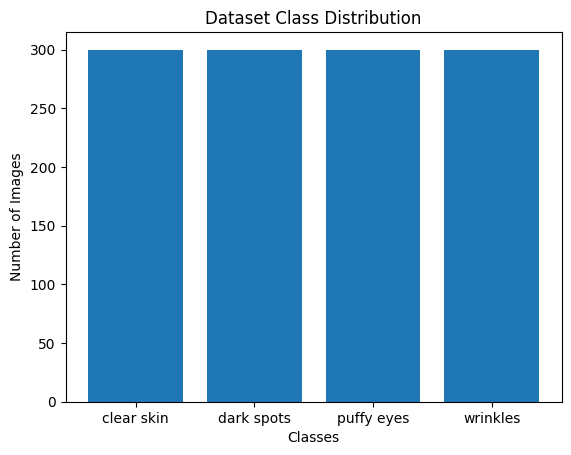

In [2]:
import matplotlib.pyplot as plt
plt.bar(df["Class"], df["Image Count"])
plt.title("Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

path = "dataset"
height, width = 224, 224
batchsize = 32

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=(0.6, 1.4),
    channel_shift_range=20.0,
    fill_mode="nearest"
)

datagenerator = datagen.flow_from_directory(
    path,
    target_size=(height, width),
    batch_size=batchsize,
    class_mode="categorical",
    shuffle=True
)

print("Class indexes:", datagenerator.class_indices)

images_batch, labels_batch = next(datagenerator)
print("Image batch shape:", images_batch.shape)



Found 1200 images belonging to 4 classes.
Class indexes: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}
Image batch shape: (32, 224, 224, 3)


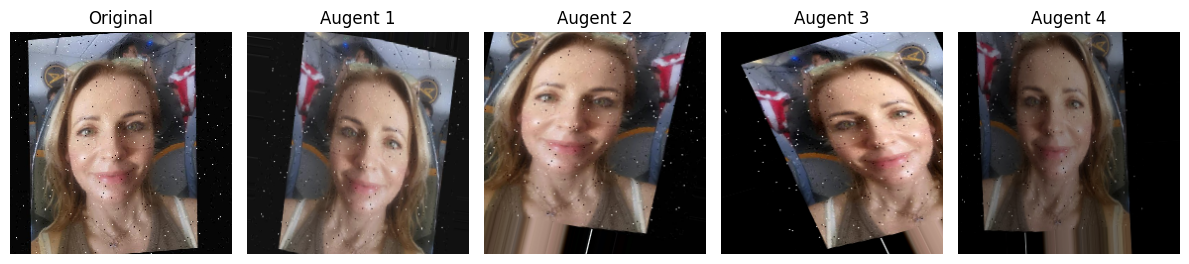

In [2]:
cls = list(datagenerator.class_indices.keys())[0]
img_path = os.path.join(path, cls, os.listdir(os.path.join(path, cls))[0])

orig = img_to_array(load_img(img_path, target_size=(height, width)))

augs = [(datagen.random_transform(orig) / 255.0) for _ in range(4)]

orig_disp = orig / 255.0

plt.figure(figsize=(12, 6))
titles = ["Original"] + [f"Augmented {i}" for i in range(1, 5)]
imgs = [orig_disp] + augs

for i, (img, title) in enumerate(zip(imgs, titles), 1):
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()
